In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [59]:
#EPISODE GENERATOR

In [60]:
def generate_episode():
    State= np.array(['T1','A','B','C','D','E','T2'])
    mapper_states={1:'A', 2:'B', 3:'C', 4:'D', 5:'E'}

    episode=[]
    state=3
    while(0<state<6):
        
        action= np.random.choice([-1,1], p=[0.5,0.5])
        
        next_state= state+action
        
        if(next_state==6):
            reward =1
        
        else:
            reward=0
        
        episode.append(mapper_states[state])
        episode.append(reward)
        
        
        state= next_state
    
    return episode
            
        
        
    

# EXAMPLE 6.2 RIGHT FIGURE (TD)

In [61]:
def runTD(alpha):
    
    mapper_states={'A':1,'B':2,'C':3,'D':4,'E':5}
    avevpi=np.zeros((100,7))
    
    for runs in range(100):
        vpi=np.array([0,0.5,0.5,0.5,0.5,0.5,0])
        
        for episodes in range(100):
            
            episode= generate_episode()
            
            T= len(episode)
            t=0
            
            while(t<T-1):                
                state= mapper_states[episode[t]]
                reward= episode[t+1]
                
                if(t+2==T):
                    next_state=0
                else:
                    next_state= mapper_states[episode[t+2]]
                
                vpi[state]= vpi[state]+ (alpha*(vpi[next_state]+reward-vpi[state]))
                t+=2
            for i in range(1,6):
                avevpi[episodes][i]= avevpi[episodes][i]+vpi[i]
        

    
    return avevpi

In [62]:
#Average over 100 runs
vpi_1= runTD(0.05)/100
vpi_2= runTD(0.10)/100
vpi_3= runTD(0.15)/100

In [63]:
True_state_values=[0,1/6,2/6,3/6,4/6,5/6,0]
rmse_1=[]
rmse_2=[]
rmse_3=[]

for episodes in range(100):
    diff_1=0
    diff_2=0
    diff_3=0
    
    for states in range(1,6):
        diff_1+= (vpi_1[episodes][states] - True_state_values[states])**2
        diff_2+= (vpi_2[episodes][states] - True_state_values[states])**2
        diff_3+= (vpi_3[episodes][states] - True_state_values[states])**2
        
        
    
    rmse_1.append(math.sqrt(diff_1/5))
    rmse_2.append(math.sqrt(diff_2/5))
    rmse_3.append(math.sqrt(diff_3/5))

# EXAMPLE 6.2 RIGHT FIGURE (MC)

In [64]:
def runMC(alpha):
    
    
    mapper_states={'A':1,'B':2,'C':3,'D':4,'E':5}
    avevpi=np.zeros((100,7))
    
    for runs in range(100):
        mcvpi=np.array([0,0.5,0.5,0.5,0.5,0.5,0])
        
        for episodes in range(100):
            
            episode= generate_episode()
            
            T= len(episode)
            t=T-1
            G=0
            
            while(t>0):
            
                reward= episode[t]
                G= G+ reward
                state= mapper_states[episode[t-1]]
        
                mcvpi[state]= ((1-alpha)*mcvpi[state]) + (alpha*G)
                
                t-=2
                
            for i in range(1,6):
                avevpi[episodes][i]= avevpi[episodes][i]+mcvpi[i]
        

    
    return avevpi
    

In [65]:
#Average over 100 runs
mc_vpi_1=runMC(0.01)/100
mc_vpi_2=runMC(0.02)/100
mc_vpi_3=runMC(0.03)/100
mc_vpi_4=runMC(0.04)/100

In [66]:
True_state_values=[0,1/6,2/6,3/6,4/6,5/6,0]
mcrmse_1=[]
mcrmse_2=[]
mcrmse_3=[]
mcrmse_4=[]

for episodes in range(100):
    diff_1=0
    diff_2=0
    diff_3=0
    diff_4=0
    
    for states in range(1,6):
        diff_1+= (mc_vpi_1[episodes][states] - True_state_values[states])**2
        diff_2+= (mc_vpi_2[episodes][states] - True_state_values[states])**2
        diff_3+= (mc_vpi_3[episodes][states] - True_state_values[states])**2
        diff_4+= (mc_vpi_4[episodes][states] - True_state_values[states])**2

        
    
    mcrmse_1.append(math.sqrt(diff_1/5))
    mcrmse_2.append(math.sqrt(diff_2/5))
    mcrmse_3.append(math.sqrt(diff_3/5))
    mcrmse_4.append(math.sqrt(diff_4/5))
    

# GENERATE THE FIGURE

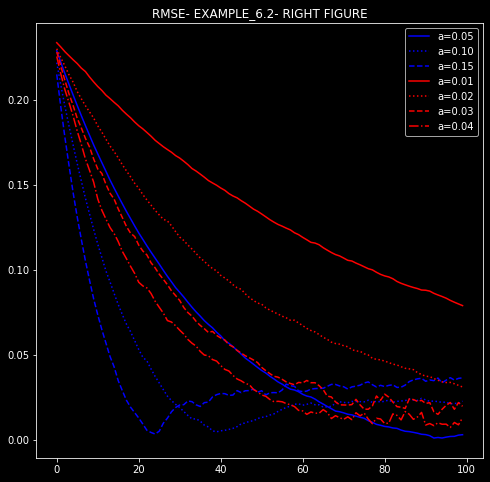

In [67]:
plt.figure(1, figsize=(8,8))
# plt.figure(1, figsize=(8,8))
plt.style.use('dark_background')
plt.title('RMSE- EXAMPLE_6.2- RIGHT FIGURE')
plt.plot(rmse_1, label='a=0.05', color='blue',linestyle='-')
plt.plot(rmse_2, label='a=0.10', color='blue',linestyle=':')
plt.plot(rmse_3, label='a=0.15', color='blue',linestyle='--')
# plt.legend()
# plt.show()
plt.plot(mcrmse_1, label='a=0.01', color='red', linestyle='-')
plt.plot(mcrmse_2, label='a=0.02',color='red', linestyle=':')
plt.plot(mcrmse_3, label='a=0.03',color='red', linestyle='--')
plt.plot(mcrmse_4, label='a=0.04',color='red', linestyle='dashdot')

plt.legend()
plt.show()